# **Importing Libraries**

In [2]:
import os
import shutil
import cv2
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import skimage
from skimage.io import imshow, imread, imsave
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras as K

# **Pure Images from the dataset, copied and renamed in the working directory**

In [3]:
# Path to 'original' folder (read-only)
original_folder = '/kaggle/input/blooddata/Original'

# Path to a writable directory
working_folder = '/kaggle/working/original_renamed/'

# Create the writable directory if it doesn't exist
if not os.path.exists(working_folder):
    os.makedirs(working_folder)

# List all the image files in the 'original' folder
image_files = sorted(os.listdir(original_folder))

# Loop through the files, copy to writable directory, and convert to .png
for i, filename in enumerate(image_files):
    # Full path to the current file
    current_path = os.path.join(original_folder, filename)
    
    # Read the image
    image = cv2.imread(current_path)
    
    # Create a new filename with a .png extension (e.g., img_0001.png)
    new_filename = f"img_{i+1:04d}.png"
    
    # Full path to the new file in the writable directory
    new_path = os.path.join(working_folder, new_filename)
    
    # Save the image as a .png file in the writable folder
    cv2.imwrite(new_path, image)

print("All images copied and converted to .png format.")

All images copied and converted to .png format.


# **Image Binarization using Otsu's Thresholding**

In [4]:
# Define the input and output directories
in_dir = '/kaggle/working/original_renamed'
out_dir = '/kaggle/working/binary_images'

# Create the output directory if it doesn't exist
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Read the input image file names with paths into a list
img_names = glob(os.path.join(in_dir, '*.png'))
print(f"Found {len(img_names)} images.")

# Process each image
for fn in img_names:
    print(f'Processing {fn}...')

    # Read the image as grayscale
    im_gray = cv2.imread(fn, 0)
    
    # Apply Otsu's threshold (binary inversion)
    im_bw = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Get the filename and create the output path
    name = os.path.basename(fn)
    outfile = os.path.join(out_dir, name)
    
    # Save the processed image to the output directory
    cv2.imwrite(outfile, im_bw)

print(f"Processing complete. Binary images saved to {out_dir}.")

Found 1328 images.
Processing /kaggle/working/original_renamed/img_0240.png...
Processing /kaggle/working/original_renamed/img_0181.png...
Processing /kaggle/working/original_renamed/img_0407.png...
Processing /kaggle/working/original_renamed/img_0471.png...
Processing /kaggle/working/original_renamed/img_0339.png...
Processing /kaggle/working/original_renamed/img_0951.png...
Processing /kaggle/working/original_renamed/img_0301.png...
Processing /kaggle/working/original_renamed/img_0183.png...
Processing /kaggle/working/original_renamed/img_0489.png...
Processing /kaggle/working/original_renamed/img_0893.png...
Processing /kaggle/working/original_renamed/img_0200.png...
Processing /kaggle/working/original_renamed/img_0625.png...
Processing /kaggle/working/original_renamed/img_1112.png...
Processing /kaggle/working/original_renamed/img_1050.png...
Processing /kaggle/working/original_renamed/img_0630.png...
Processing /kaggle/working/original_renamed/img_0970.png...
Processing /kaggle/wo

# **Displaying Random 5 Segmented Images**

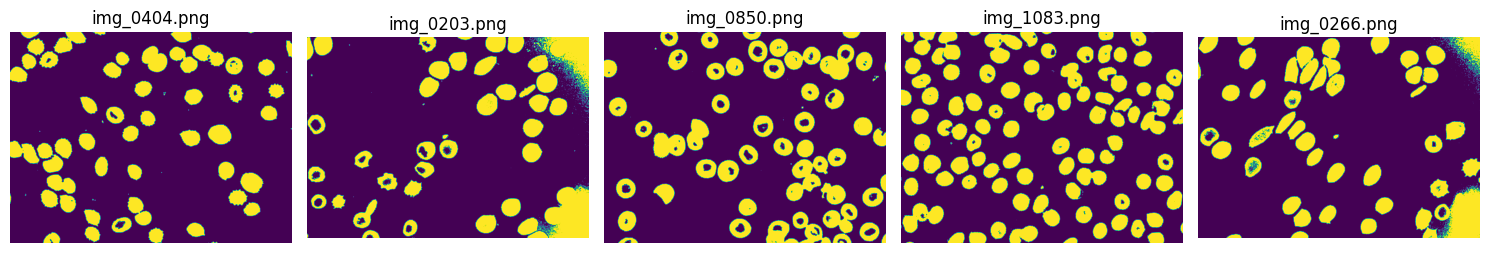

In [5]:
# Path to the directory containing segmented images
segmented_image_folder = '/kaggle/working/binary_images/'

# List all the image files in the segmented image folder
image_files = sorted(os.listdir(segmented_image_folder))

# Randomly select 5 images (or fewer if there are less than 5)
num_images_to_display = min(5, len(image_files))
selected_images = random.sample(image_files, num_images_to_display)

# Calculate rows and columns for the subplot
cols = 5
rows = (num_images_to_display // cols) + (num_images_to_display % cols > 0)

# Display the images
plt.figure(figsize=(15, rows * 3))  # Adjust the height based on the number of rows
for i, filename in enumerate(selected_images):
    img_path = os.path.join(segmented_image_folder, filename)
    img = mpimg.imread(img_path)
    
    plt.subplot(rows, cols, i + 1)  # Use calculated rows and cols
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(filename)

plt.tight_layout()
plt.show()


# **Ground truth mask images from the dataset, copied and renamed in the working directory**

In [6]:
# Path to 'mask' folder (read-only)
mask_folder = '/kaggle/input/blooddata/Mask'

# Path to a writable directory
working_folder = '/kaggle/working/mask_renamed/'

# Create the writable directory if it doesn't exist
if not os.path.exists(working_folder):
    os.makedirs(working_folder)

# List all the image files in the 'mask' folder
image_files = sorted(os.listdir(mask_folder))

# Loop through the files, copy to writable directory, and convert to .png
for i, filename in enumerate(image_files):
    # Full path to the current file
    current_path = os.path.join(mask_folder, filename)
    
    # Read the image using Pillow
    image = Image.open(current_path)
    
    # Create a new filename with a .png extension (e.g., img_0001.png)
    new_filename = f"img_{i+1:04d}.png"
    
    # Full path to the new file in the writable directory
    new_path = os.path.join(working_folder, new_filename)
    
    # Save the image as a .png file in the writable folder, stripping the color profile
    image.save(new_path, 'PNG', icc_profile=None)

print("All masks copied and converted to .png format without warnings.")

All masks copied and converted to .png format without warnings.


# **Checking if the binary images and the ground truths are in the same dimensions**

In [7]:
# Paths to your directories
segmented_images_dir = '/kaggle/working/binary_images'
masks_dir = '/kaggle/working/mask_renamed'

# Get lists of all images in both directories
segmented_images = sorted(glob(os.path.join(segmented_images_dir, '*.png')))
masks = sorted(glob(os.path.join(masks_dir, '*.png')))

# Ensure both lists have the same length
if len(segmented_images) != len(masks):
    print("The number of segmented images and masks do not match.")
else:
    for seg_image_path, mask_path in zip(segmented_images, masks):
        # Load the images as grayscale
        segmented_image = cv2.imread(seg_image_path, cv2.IMREAD_GRAYSCALE)
        mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Get the shapes
        segmented_shape = segmented_image.shape
        mask_shape = mask_image.shape

        # Print the shapes
        print(f"Segmented Image: {os.path.basename(seg_image_path)} - Shape: {segmented_shape}")
        print(f"Mask Image: {os.path.basename(mask_path)} - Shape: {mask_shape}")

        # Check if they are the same
        if segmented_shape == mask_shape:
            print("The segmented image and mask are of the same dimensions.")
        else:
            print("The segmented image and mask have different dimensions.")

Segmented Image: img_0001.png - Shape: (1200, 1600)
Mask Image: img_0001.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0002.png - Shape: (1200, 1600)
Mask Image: img_0002.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0003.png - Shape: (1200, 1600)
Mask Image: img_0003.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0004.png - Shape: (1200, 1600)
Mask Image: img_0004.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0005.png - Shape: (1200, 1600)
Mask Image: img_0005.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0006.png - Shape: (1200, 1600)
Mask Image: img_0006.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0007.png - Shape: (1200, 1600)
Mask Image: 

# **Checking original image, corresponding ground truth and segmented image**

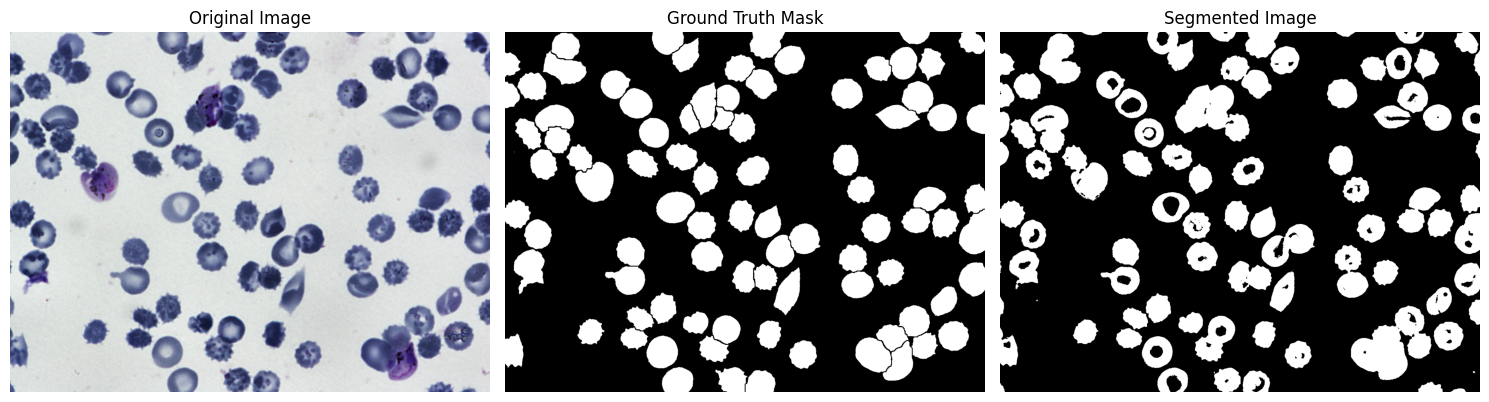

In [11]:
# Define paths to the images
original_image_path = '/kaggle/working/original_renamed/img_0030.png'
ground_truth_image_path = '/kaggle/working/mask_renamed/img_0030.png'
segmented_image_path = '/kaggle/working/binary_images/img_0030.png'

# Load the images
original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR)
ground_truth_image = cv2.imread(ground_truth_image_path, cv2.IMREAD_GRAYSCALE)
segmented_image = cv2.imread(segmented_image_path, cv2.IMREAD_GRAYSCALE)

# Convert BGR to RGB for the original image
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Set up the subplot for displaying images
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Display the ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(ground_truth_image, cmap='gray')
plt.title('Ground Truth Mask')
plt.axis('off')  # Hide axes

# Display the segmented image
plt.subplot(1, 3, 3)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()


# **Dice Coefficient and Jaccard Index Functions**

In [8]:
#Dice coffeciend and jaccard index methods
def dice_coef2(a, b):
    hi = a / 255
    pred = b / 255
    hi = tf.keras.backend.flatten(hi)
    pred = tf.keras.backend.flatten(pred)
    upper_part = 2 * tf.keras.backend.sum(hi * pred)
    lower_part = tf.keras.backend.sum(hi + pred)
    dice = upper_part / lower_part
    return dice.numpy()  # Convert tensor to numpy for easier readability

def jaccard_index2(a, b):
    hi = a / 255
    pred = b / 255
    hi = tf.keras.backend.flatten(hi)
    pred = tf.keras.backend.flatten(pred)
    numerator = tf.keras.backend.sum(hi * pred)
    denominator = tf.keras.backend.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou.numpy()  # Convert tensor to numpy for easier readability

# **Evaluate Segmentation Performance**

In [10]:
# Paths to the segmented images and ground truth masks
segmented_folder = '/kaggle/working/binary_images/'
mask_folder = '/kaggle/working/mask_renamed/'

# List all the image files in the segmented folder
image_files = sorted(os.listdir(segmented_folder))
mask_files = sorted(os.listdir(mask_folder))

# Initialize variables to store total scores
total_dice_score = 0
total_iou_score = 0
num_images = len(image_files)

# Loop through each file and evaluate
for i, filename in enumerate(image_files):
    # Load the corresponding mask
    mask_path = os.path.join(mask_folder, mask_files[i])
    mask = cv2.imread(mask_path, 0)

    # Load the Otsu-segmented image
    img_path = os.path.join(segmented_folder, filename)
    segmented_image = cv2.imread(img_path, 0)

    # Calculate Dice and IoU
    dice_score = dice_coef2(segmented_image, mask)
    iou_score = jaccard_index2(segmented_image, mask)

    # Accumulate scores
    total_dice_score += dice_score
    total_iou_score += iou_score

    print(f"Image {filename} - Dice Coefficient: {dice_score:.4f}, Jaccard Index: {iou_score:.4f}")

# Calculate average scores
average_dice_score = total_dice_score / num_images if num_images > 0 else 0
average_iou_score = total_iou_score / num_images if num_images > 0 else 0

# print average scores
print(f"Average Dice Coefficient: {average_dice_score:.4f}")
print(f"Average Jaccard Index: {average_iou_score:.4f}")

Image img_0001.png - Dice Coefficient: 0.8928, Jaccard Index: 0.8063
Image img_0002.png - Dice Coefficient: 0.9010, Jaccard Index: 0.8199
Image img_0003.png - Dice Coefficient: 0.9590, Jaccard Index: 0.9213
Image img_0004.png - Dice Coefficient: 0.9371, Jaccard Index: 0.8816
Image img_0005.png - Dice Coefficient: 0.9159, Jaccard Index: 0.8448
Image img_0006.png - Dice Coefficient: 0.9074, Jaccard Index: 0.8304
Image img_0007.png - Dice Coefficient: 0.8642, Jaccard Index: 0.7609
Image img_0008.png - Dice Coefficient: 0.9229, Jaccard Index: 0.8568
Image img_0009.png - Dice Coefficient: 0.9598, Jaccard Index: 0.9227
Image img_0010.png - Dice Coefficient: 0.8828, Jaccard Index: 0.7902
Image img_0011.png - Dice Coefficient: 0.9138, Jaccard Index: 0.8414
Image img_0012.png - Dice Coefficient: 0.9397, Jaccard Index: 0.8862
Image img_0013.png - Dice Coefficient: 0.9269, Jaccard Index: 0.8637
Image img_0014.png - Dice Coefficient: 0.9237, Jaccard Index: 0.8583
Image img_0015.png - Dice Coeffici